Se realizan las instalaciones e importaciones de todas las librerias a usar en el proyecto. Numpy, Pandas y Matplotlib con sus respectivas versiones. 

In [1]:
#Instalación de librerias.
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip instal seaborn

#Importación de librerias con nombres abreviados.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#Verificador de versiones.
print("La versión de np es: ",np.__version__)
print("La versión de pd es: ",pd.__version__)

#Importación de drive para acceder a los DataFrames
from google.colab import drive
drive.mount('/content/drive')

#Visualización de archivos en entorno Colab de Drive
!cat '/content/drive/MyDrive  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "instal" - maybe you meant "install"
La versión de np es:  1.22.4
La versión de pd es:  1.4.4
Mounted at /content/drive
/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file


Impotación de Df a Utilizar para el proyecto asignados. Nombres de 1920 a 2014.




In [2]:
dfnom2024 = pd.read_csv('/content/drive/MyDrive/proye py 1 /nombres-1920-1924.csv')
dfnom2529 = pd.read_csv('/content/drive/MyDrive/proye py 1 /nombres-1925-1929.csv')
dfnom3034 = pd.read_csv('/content/drive/MyDrive/proye py 1 /nombres-1930-1934.csv')
dfnom3539 = pd.read_csv('/content/drive/MyDrive/proye py 1 /nombres-1935-1939.csv')
dfnom4044 = pd.read_csv('/content/drive/MyDrive/proye py 1 /nombres-1940-1944.csv')
dfnom4549 = pd.read_csv('/content/drive/MyDrive/proye py 1 /nombres-1945-1949.csv')
dfnom5054 = pd.read_csv('/content/drive/MyDrive/proye py 1 /nombres-1950-1954.csv')
dfnom5559 = pd.read_csv('/content/drive/MyDrive/proye py 1 /nombres-1955-1959.csv')
dfnom6064 = pd.read_csv('/content/drive/MyDrive/proye py 1 /nombres-1960-1964.csv')
dfnom6569 = pd.read_csv('/content/drive/MyDrive/proye py 1 /nombres-1965-1969.csv')
dfnom7074 = pd.read_csv('/content/drive/MyDrive/proye py 1 /nombres-1970-1974.csv')
dfnom7579 = pd.read_csv('/content/drive/MyDrive/proye py 1 /nombres-1975-1979.csv')
dfnom8084 = pd.read_csv('/content/drive/MyDrive/proye py 1 /nombres-1980-1984.csv')
dfnom8589 = pd.read_csv('/content/drive/MyDrive/proye py 1 /nombres-1985-1989.csv')
dfnom9094 = pd.read_csv('/content/drive/MyDrive/proye py 1 /nombres-1990-1994.csv')
dfnom9599 = pd.read_csv('/content/drive/MyDrive/proye py 1 /nombres-1995-1999.csv')
dfnom0004 = pd.read_csv('/content/drive/MyDrive/proye py 1 /nombres-2000-2004.csv')
dfnom0409 = pd.read_csv('/content/drive/MyDrive/proye py 1 /nombres-2005-2009.csv')
dfnom1014 = pd.read_csv('/content/drive/MyDrive/proye py 1 /nombres-2010-2014.csv')


Para trabajar con todos los rangos de años requeridos realizo un solo df de 3 filas (nombre,cantidad,anio)

In [3]:
dftotal = pd.concat([dfnom2024, dfnom2529, dfnom3034, dfnom3539, dfnom4044, dfnom4549, dfnom5054, dfnom5559, dfnom6064, dfnom6569,
                    dfnom7074, dfnom7579, dfnom8084, dfnom8589, dfnom9094, dfnom9599, dfnom0004, dfnom0409], axis = 0) 
                    # Concateno las filas del df uno debajo manteniendo el formato original en columnas y lo guardo en dftotal.

dftotal.info() #Utilizo para ver informacion sobre el df



<class 'pandas.core.frame.DataFrame'>
Int64Index: 8680259 entries, 0 to 725459
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   nombre    object
 1   cantidad  int64 
 2   anio      int64 
dtypes: int64(2), object(1)
memory usage: 264.9+ MB


Se solicita el Año con mayor cantidad de personas registradas.



In [4]:
anios = dftotal.groupby("anio")["cantidad"].sum() #Genero un obj que me muestra por año, la cantidad de nombres anotados.
anioordenado = anios.sort_values(ascending=False).head(1).reset_index() #Ordeno en sentido descendente, extraigo el primer valor y reseteo el indice 
print("El año con la mayor cantidad de registros fue: ", anioordenado.iloc[0,0]) # Muestro en pantalla el año con mayor cantidad de registros.

El año con la mayor cantidad de registros fue:  1993


Se solicita el Nombre más popular en todo el rango de años.

In [5]:
nombres = dftotal.groupby("nombre")["cantidad"].sum() #Genero un obj que me muestra la cantidad por nombre 
nombresordenado = nombres.sort_values(ascending=False).head(1).reset_index() #Ordeno en sentido descendente, extraigo el primer valor y reseteo el indice 
print("El nombre más popular en todo el rango de años es: ", nombresordenado.iloc[0,0])# Muestro en pantalla el nombre mas popular.

El nombre más popular en todo el rango de años es:  Juan Carlos


Se solicita el Nombre más largo.

In [6]:
def nombresinsigno(nombres): #defino la funcion contletras y le envio el nombre de cada fila 
    nombres = str(nombres) #convertir a str nombres
    palabrasinsignos="" #creo un string para escribir la palabra sin signos
    for letra in nombres: #itero sobre la las letras del nombre
        if letra.isalnum(): #si no es alfanumerico es True y entra al if
            palabrasinsignos += letra #agrego el caracter a la palabra
    numeroletras = len(palabrasinsignos) #cuento la cantidad de letras de palabrassinsignos
    return(numeroletras) #me devuelve la cantidad de letras del string

dfcolletras = dftotal.copy(deep=True) # Creo un dataframe para no modificar el original.
 
dfcolletras["cantidad de letras"] =  dfcolletras["nombre"].apply(nombresinsigno) #Genero una fila con el numero de letras aplicando funcion nombre signo
dfnombord= dfcolletras.sort_values(by=["cantidad de letras"], ascending=False).reset_index() #ordeno por cantidad de letras de forma descendente y reindexo
print("El nombre mas largo es : ", dfnombord.iloc[0,1] ) #muestro el primer nombre mas largo del dataframe ordenado anteriormente 

El nombre mas largo es :  Josina Livina Dolores Lucia Carmen Balduina Yolanda Maria Inmaculada Gislena Javiera


Agregue información al dataset considerando lo siguiente:
Una columna con el número de palabras del nombre;


In [7]:
def cantidad_de_nombres(nombre):#defino la funcion cantidad de nombres ingresa con el valor de la fila 
    nombre = str(nombre) #seteo nombre como string
    palabrasinsignospal="" #creo un str vacío para completarlo
    for x in nombre: #recorro el nombre por cada caracter
        if x.isalnum(): #si no es alfanumerico es True y entra al if
            palabrasinsignospal += x #agrego el caracter a la palabra
        if x==" ": #agrego la condición de si es un espacio
            palabrasinsignospal += x #agrego el espacio en caso que x lo sea
    cantidadpalabras = len(palabrasinsignospal.split()) #Aplico split() (divide str por espacios creando una lista con cada palabra)
                                                        # Y cuento la cantidad de elementos de la lista
    return(cantidadpalabras) #retorno la cantidad de palabras.

dfagreg1 = dftotal.copy(deep=True)#hago una copia del df
dfagreg1["palabras del nombre"] =  dfagreg1["nombre"].apply(cantidad_de_nombres) #Genero una fila con el numero de letras

print(dfagreg1.iloc[0:10,0:4]) #verificación de que se cumpla lo solicitado.

         nombre  cantidad  anio  palabras del nombre
0         Maria       314  1922                    1
1          Rosa       203  1922                    1
2          Jose       163  1922                    1
3   Maria Luisa       127  1922                    2
4        Carmen       117  1922                    1
5           Ana       113  1922                    1
6   Maria Elena       112  1922                    2
7         Juana       111  1922                    1
8  Maria Esther       109  1922                    2
9       Antonio       103  1922                    1


Agregue información al dataset considerando lo siguiente: Una columna con el porcentaje de ese nombre por año;


In [8]:
dataframeporcentaje = dftotal.copy(deep=True) #Creo una copia para no perder el original
dataframeporcentaje["cantidad por año"] = dataframeporcentaje.groupby("anio")["cantidad"].sum()[dataframeporcentaje.anio].values#Creo una columna cantidad por año realizando la suma por cada año y 
                                                                                                                                #se lo asigo a todas aquellas que tengan ese año
#Creo una columna porcentaje por año que me da el resultado de la division entre cantidad y cantidad por año multtiplicado por 100
dataframeporcentaje["porcentaje por año"] = dataframeporcentaje["cantidad"]/dataframeporcentaje["cantidad por año"]*100
#elimino la columna cantidad por año 
dataframeporcentaje.drop('cantidad por año', inplace=True, axis=1) 

print(dataframeporcentaje)



                   nombre  cantidad  anio  porcentaje por año
0                   Maria       314  1922            1.326742
1                    Rosa       203  1922            0.857734
2                    Jose       163  1922            0.688723
3             Maria Luisa       127  1922            0.536612
4                  Carmen       117  1922            0.494359
...                   ...       ...   ...                 ...
725455      Stefani Gisel         1  2009            0.000171
725456  Angeles Katherine         1  2009            0.000171
725457     Emir Guillermo         1  2009            0.000171
725458     Augusto Eliseo         1  2009            0.000171
725459                NaN         1  2009            0.000171

[8680259 rows x 4 columns]


Porcentaje de datos que cada año aporto al total de información

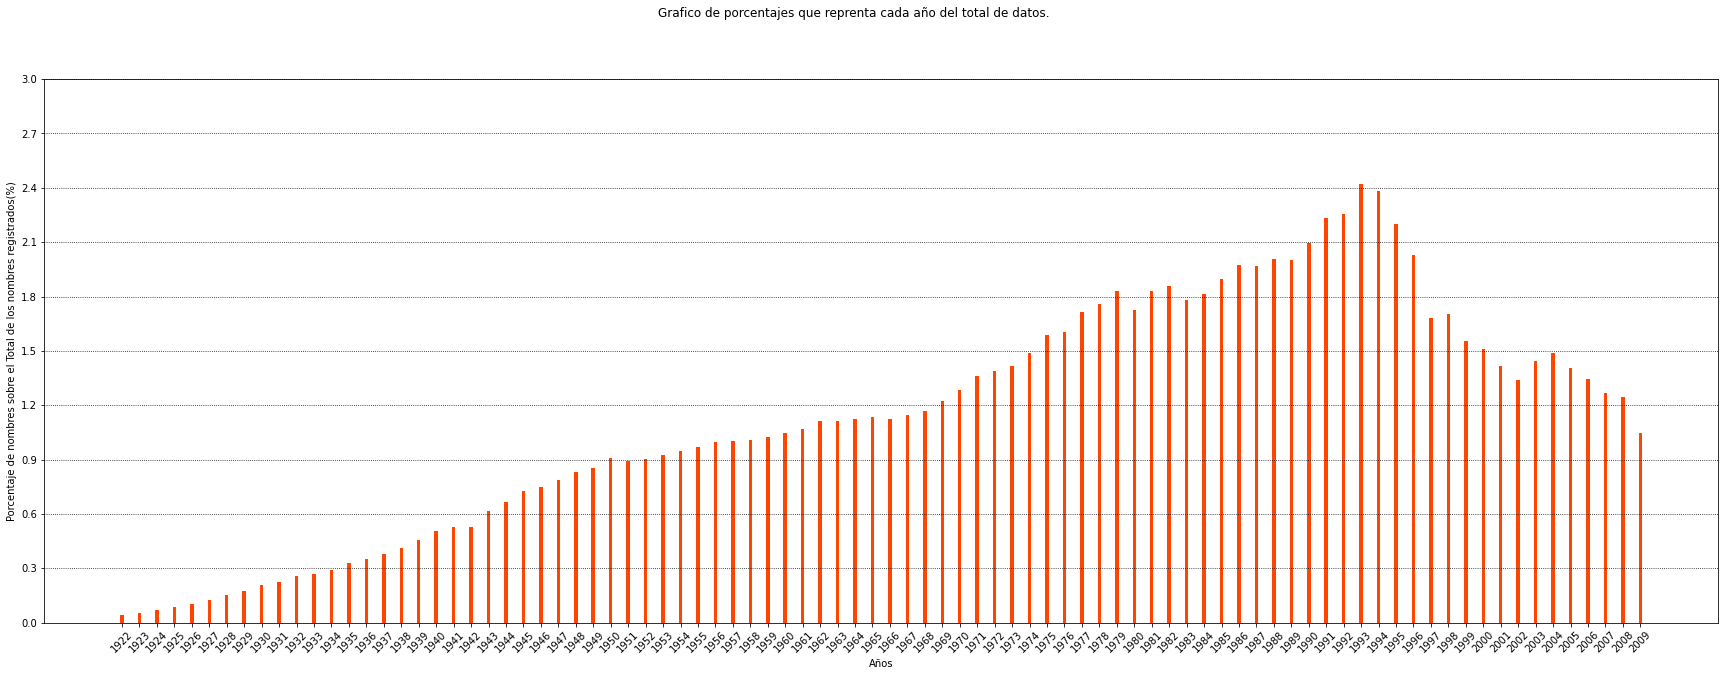

In [9]:
dfaport = dftotal.copy(deep=True) #Igualo el df total para no perder el original

años = dfaport.anio.unique() #convierto en arra los años 
cantidadaño = dfaport.groupby("anio").sum().reset_index() #agrupo por años la sumas de cantidad de nombre, sumo y reseteo el index
total = dfaport["cantidad"].sum()
tupla = ((cantidadaño.iloc[:,1].unique())/total)*100 #convierto en tupla los valores totales por años

plt.figure(figsize=(30,10))

plt.bar(años,tupla , width=0.20, label='años', color="orangered") #grafico barra con los 11 primero años de juan con un ancho
                                                                    #de 0.20 y corrido 0.10 para que quede a la izquierda

plt.xticks(rotation=45)
plt.xlabel('Años') #Asigno nombre de x a años
plt.ylabel("Porcentaje de nombres sobre el Total de los nombres registrados(%)") #asigno nombre de y en cantidad x 100
plt.xticks(años)#muestre por año y no intermedios
plt.ylim(0,3) # establezco maximo para tener una mejor comparación entre graficos
plt.grid(axis='y',linestyle='dotted', color='black')
plt.yticks([0,0.3,0.6,0.9,1.2,1.5,1.8,2.1,2.4,2.7,3])#determino las separaciones en el eje y 
plt.suptitle("Grafico de porcentajes que reprenta cada año del total de datos.")
plt.show()


- Evolución del registro de los nombres 'Maria' y 'Juan' (solamente, sin primeros ni segundos nombres, y sin tildes). Marcar cuál es el año donde más veces se registraron;

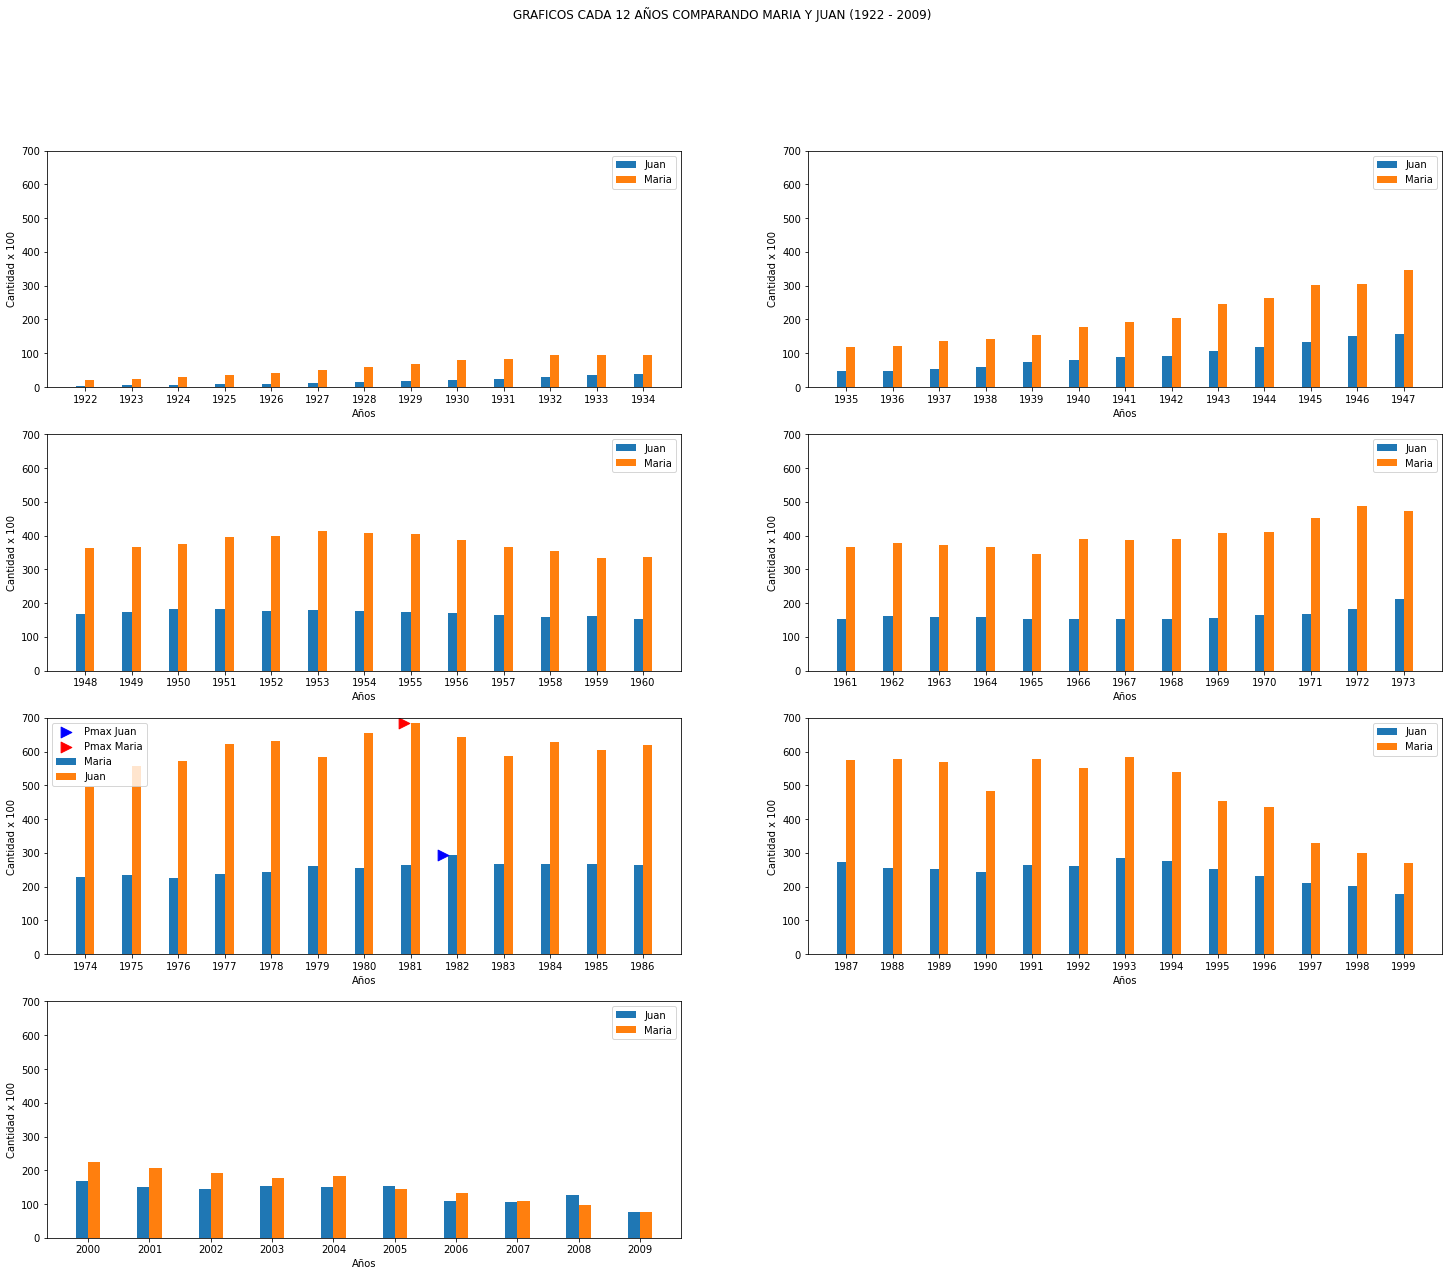

In [10]:
x = 0 # asigno valores para el while para iterar sobre los diferente años y cantidades
y = 13 
subplot = 421 #Doy el numero inicial de subplot

dfmj = dftotal.copy(deep=True) #igualo los dataframe para no perderlos
dfjuan = dfmj.dropna(inplace=True) #al no ver totales solo me importan los nombres saco los valores NaN para poder verificarlos los valores como str

#Juan pandas
dfjuan = dfmj[dfmj.nombre.str.contains('Juan ')] #Saco todos los valores de juan por año
dfgrup = dfjuan.groupby("anio").sum().reset_index() # hago la suma de juan por año 

#Juan adquiero valores para grafico barra
años = dfmj.anio.unique() #separo todos los años
juanescantidad = dfgrup.iloc[:,1].unique() #separo todos los juanes por años
juanescantidad = juanescantidad/100 #divido para mostrar por 100 en el grafico

#Juan adquiero valores maximos para scatter
valor_maximo_juan=juanescantidad.max() #saco el valor maximo de juan
posicionmaxjuan = np.where(juanescantidad == valor_maximo_juan) #Busco la posición para buscarlo en años
añosmaxjuan = años[posicionmaxjuan] #Guardo el año para despues mostrarlo en el grafico
juanentero = int(posicionmaxjuan[0]) #Saca el entero de la posicion para determinar en qué grafico ponerlo

#Maria pandas
dfmaria = dfmj[dfmj.nombre.str.contains('Maria ')] #Saco todos los valores de Maria por año
dfgrmaria = dfmaria.groupby("anio").sum().reset_index() # Hago la suma de Maria por año

#Maria adquiero valores para grafico barra
mariacantidad = dfgrmaria.iloc[:,1].unique() #separo todos las marias por años
mariacantidad = mariacantidad/100 #divido para mostrar por 100 en el grafico

#Maria adquiero valores maximos para scatter
valor_maximo_maria=mariacantidad.max() #saco el valor maximo de juan
posicionmaxmaria= np.where(mariacantidad == valor_maximo_maria) #Busco la posición para buscarlo en años
añosmaxmaria = años[posicionmaxmaria] #Guardo el año para despues mostrarlo en el grafico
mariaentero = int(posicionmaxmaria[0]) #Saca el entero de la posicion para determinar en que grafico ponerlo

plt.figure(figsize=(25,20)) #determino una figura de x=25 y y=20

while subplot <= 426:
    plt.subplot(subplot) # 4x2 en la posición 1 - 6
    plt.bar(años[x:y]-0.10,juanescantidad[x:y] , width=0.20, label='Juan') #grafico barra con los 11 primero años de juan con un ancho
                                                                            #de 0.20 y corrido 0.10 para que quede a la izquierda
    plt.bar(años[x:y],mariacantidad[x:y],align = "edge", width=0.20,label = "María")#grafico barra con los 11 primero años de maria con un ancho
                                                                                    #de 0.20 y con alingn = "edge" para para que quede a la derecha
    plt.legend(['Juan', 'Maria']) #genero recuadro con datos juan y maria para identificar
    plt.xlabel('Años') #Asigno nombre de x a años
    plt.ylabel('Cantidad x 100') #asigno nombre de y en cantidad x 100
    plt.xticks(años[x:y])#muestre por año y no intermedios
    plt.ylim(0,700) # establezco maximo para tener una mejor comparación entre graficos
    if juanentero>x and juanentero<y:#verifico si juan maximo esta dentro del rango 
        plt.scatter(añosmaxjuan-0.30,valor_maximo_juan,c="blue",marker = ">",s=115) #marco el punto max corrido 0,30 color azul con marcador menor y tamaño 115
    if mariaentero>x and mariaentero<y:#verifico si mario maximo esta dentro del rango 
        plt.scatter(añosmaxmaria-0.15,valor_maximo_maria,c="red",marker = ">",s=115)#marco el punto max corrido 0,30 color azul con marcador menor y tamaño 115
        plt.legend(["Pmax Juan","Pmax Maria","Maria", "Juan"],facecolor=None) #Pongo legenda con todos los puntos.
    x += 13 #sumo variables para el proximo ciclo
    y += 13
    subplot += 1

#Al no poder agregar al ciclo ya que cambian rangos de años dibujo el ultimo grafico aparte.

plt.subplot(427) # 4x2 en la posición 7 para graficar el resto de los años que faltan
plt.bar(años[78:89]-0.10,juanescantidad[78:89] , width=0.20, label='Juan')#grafico barra con los los ultimos años de juan con un ancho
                                                                         #de 0.20 y corrido 0.10 para que quede a la izquierda
plt.bar(años[78:89],mariacantidad[78:89],align = "edge", width=0.20,label = "María")#grafico barra con los los ultimos años de juan con un ancho
                                                                                  #de 0.20 y con alingn = "edge" para para que quede a la derecha
plt.legend(['Juan', 'Maria']) #genero recuadro con datos juan y maria para identificar
plt.xlabel('Años') #Asigno nombre de x a años
plt.ylabel('Cantidad x 100') #asigno nombre de y en cantidad x 100
plt.xticks(años[78:89])#muestre por año y no intermedios 
plt.ylim(0,700) # establezco maximo para tener una mejor comparación entre graficos
plt.suptitle("GRAFICOS CADA 12 AÑOS COMPARANDO MARIA Y JUAN (1922 - 2009)")
plt.show()

- El nombre más popular en cada año.

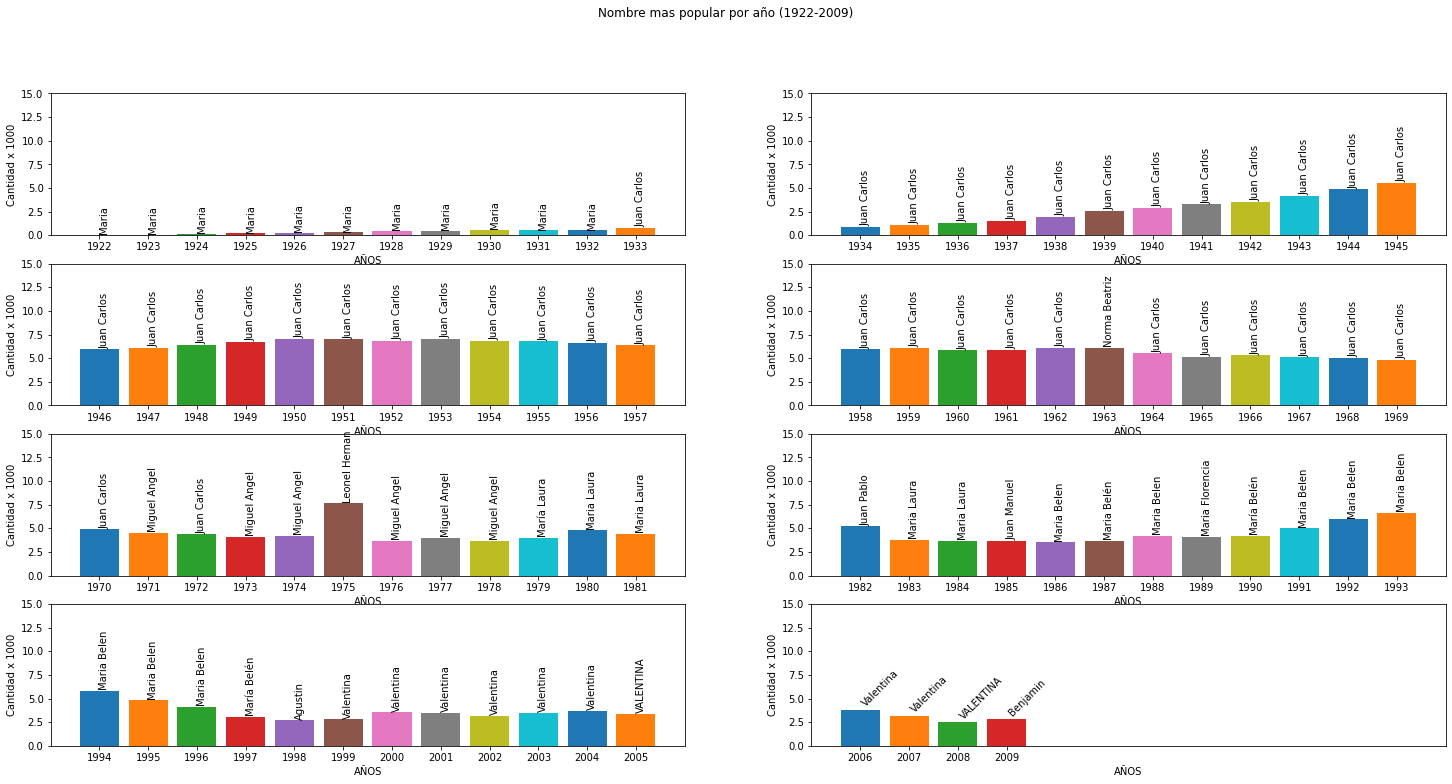

In [11]:
dfpopular = dftotal.copy(deep=True) #Copio el df para no perder el origina


dfpopular.dropna(inplace=True) # Elimino todos los valores nulos 
prueba = dfpopular.groupby("anio")["cantidad"].max() # agrupo por anio y cantidad y saco el maximo por año
pruebadf=prueba.to_frame().reset_index() #convierto en df el objeto groupby y reseteo el index

# comparo el df original con el del grupby para sacar las filas donde esta el nombre y generar un nuevo df
dfresultado = pd.merge(dfpopular,pruebadf[["anio","cantidad"]],how="inner") 

#Paso todos las columnas del df a listas para graficar
años=dfresultado["anio"].tolist()
cantidad=(dfresultado["cantidad"]/1000).tolist()
nombres=dfresultado["nombre"].tolist()

# Separo cada lista en 12 exepto la ultima que me queda de un tamaño de cuatro para trabajar con subplot
n=12
añosgrafico=[años[i:i + n] for i in range(0, len(años), n)]
cantidadgrafico=[cantidad[i:i + n] for i in range(0, len(cantidad), n)]
nombresgrafico=[nombres[i:i + n] for i in range(0, len(nombres), n)]

#establezco el tamaño de la figura
plt.figure(figsize=(25,12))

subplot=421
lista=0

while subplot <= 427:
    plt.subplot(subplot)#posiciones
    plt.ylim(0,15)#limites de y 
    plt.xlim(añosgrafico[lista][0]-1,añosgrafico[lista][0]+12)#establezco los limites de x para una mejor visualizacion de los nobres
    plt.xticks(añosgrafico[lista])#establezco los años como unidades en eje x 
    for i in range(0,12):#itero sobre cada uno de las listas para graficarlo
        plt.bar(añosgrafico[lista][i],cantidadgrafico[lista][i]-0.3) #genero una barra con un menor valor en y para no tapar el nombre
        plt.text(añosgrafico[lista][i],cantidadgrafico[lista][i],nombresgrafico[lista][i],rotation=90)#muestro el texto en cada valor de barra 
    plt.xlabel("AÑOS")#establezco los años como eje y
    plt.ylabel('Cantidad x 1000') #establezco la cantidad por 1000 por año (la division por 1000 se realizo para tener mejor visualizacion en los subplots)
    subplot= subplot+1 #amento el subpplot para la siguiente ejecucion
    lista = lista+1 #aumento la lista para que analice todas las listas
    
plt.subplot(428) #posicion 8
plt.ylim(0,15) # limite del eje y
plt.xlim(añosgrafico[7][0]-1,añosgrafico[7][0]+12) #limites x 
plt.xticks(añosgrafico[7]) #valores eje x 
for i in range(0,4): #itero sobre los ultimos 4 años
    plt.bar(añosgrafico[7][i],cantidadgrafico[7][i]-0.3) #grafico barras 
    plt.text(añosgrafico[7][i],cantidadgrafico[7][i],nombresgrafico[7][i],rotation=45) #grafico los nombres sobre las barras 
plt.xlabel("AÑOS")
plt.ylabel('Cantidad x 1000')
plt.suptitle("Nombre mas popular por año (1922-2009)")


plt.show()

            


